In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [9]:
from printer_anomaly_detection.model.cae import CAE
from pathlib import Path
import tensorflow as tf


project_path = Path('../../../../')

from printer_anomaly_detection.dataset.audio import Split, load_audio_dataset_split


dataset_path = project_path / 'datasets' / 'prints'

dataset = load_audio_dataset_split(dataset_path, 'exhaust', Split.TRAIN, window_size=256, step_size=1024)

Normalization: None, None


: 

In [5]:
from printer_anomaly_detection.dataset.audio import get_normalization_stats

In [6]:
mean, var = get_normalization_stats(dataset_path, 'original')
mean, var

(0.03762341, 0.00350116)

In [7]:
normalization = tf.keras.layers.Normalization(axis = None)
normalization.adapt(dataset)

2023-06-25 18:57:34.936723: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
/home/y2g/projects/personal/printer-anomaly-detection/src/printer_anomaly_detection/dataset/audio.py:73: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, _ = librosa.load(path.as_posix())
/home/y2g/projects/personal/printer-anomaly-detection/.venv/lib/python3.10/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/y2g/projects/personal/printer-anomaly-detection/src/printer_anomaly_detection/dataset/audio.py:73: UserWarning: PySoundFile failed. Trying audi

In [8]:
normalization.mean.numpy(), normalization.variance.numpy()

(array([[0.5071462]], dtype=float32), array([[0.59262085]], dtype=float32))

In [7]:
dataset.take(100)

<_TakeDataset element_spec=TensorSpec(shape=(256, 256), dtype=tf.float32, name=None)>

In [8]:
import matplotlib.pyplot as plt

plt.imshow(images[90])

NameError: name 'images' is not defined

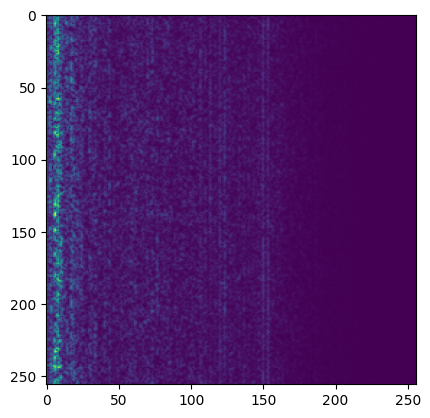

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(images[85])

In [ ]:
import datetime

datetime.datetime.now().isoformat(timespec='seconds')

'2023-06-21T18:53:56'

: 